<a href="https://colab.research.google.com/github/ErikRidhoFirm/Pembelajaran-Mesin_Ganjil_2025/blob/main/Pembelajaran_Mesin_Praktikum11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Praktikum 1**

Langkah 1 - Import Library

In [107]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

Langkah 2 - Membuat Data Dummy

Model yang digunakan adalah model yang sederhana berupa generative model untuk menentukan label pada poin baru.

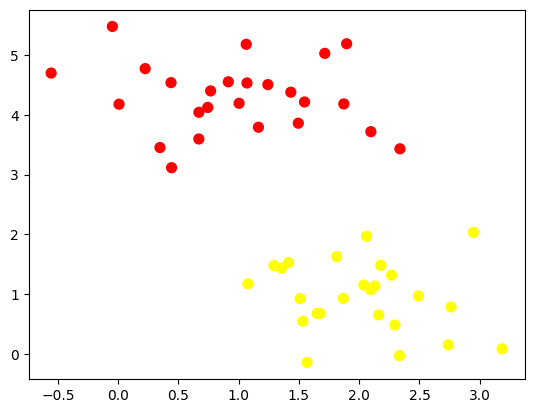

In [108]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

Langkah 3 - Buat Ilustrasi Garis Pemisah

(-1.0, 3.5)

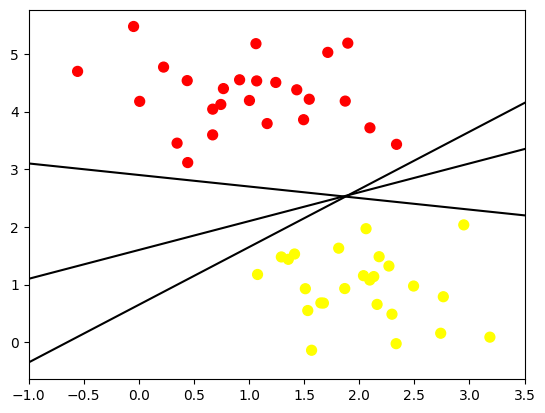

In [109]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')

plt.xlim(-1, 3.5)

Langkah 4 - Ilustrasi Margin

(-1.0, 3.5)

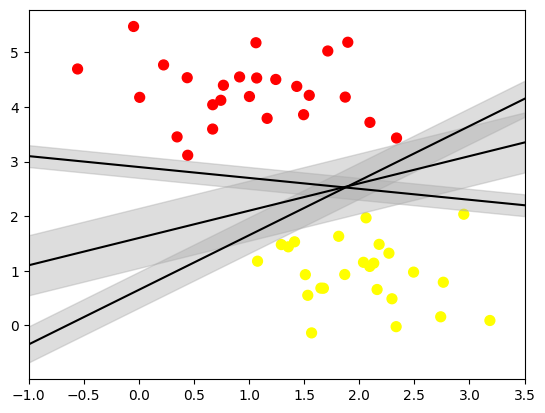

In [110]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

Langkah 5 - Fitting Model

In [111]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

Selanjutnya buat fungsi untuk membantu visualisasi hasil fit model.

In [112]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

Lakukan plotting dengan fungsi yang telah dibuat

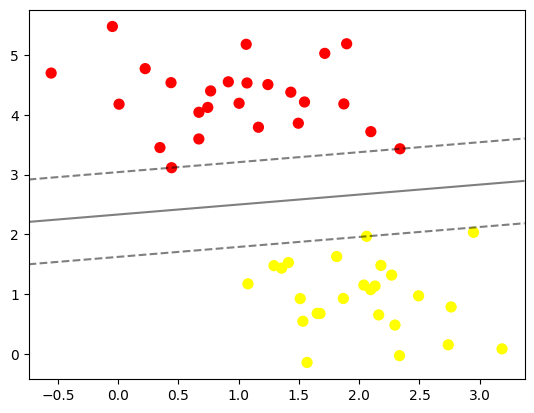

In [113]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

Beberapa titik data yang menyentuh (masuk ke area) garis disebut sebagai support vector. Untuk mengetahui data yang masuk ke dalam support vector dapat dilakukan dengan memanggil support_vectors_

In [114]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

Hasil fitting merupakan kunci keberhasilan suatu classifier (yang hanya dilihat dari posisi dari support vector). Data-data lain yang berada jauh dari margin dan tetap berada di area yang tepat tidak memiliki kemampuan untuk memodifikasi fitting (karena bukan support vector). Data-data tersebut tidak berkontribusi terhadap loss function yang digunakan untuk fitting model. Untuk lebih memahami hal ini, 60 dan 120 data awal digunakan sebagai contoh dalam bentuk perbandingan.

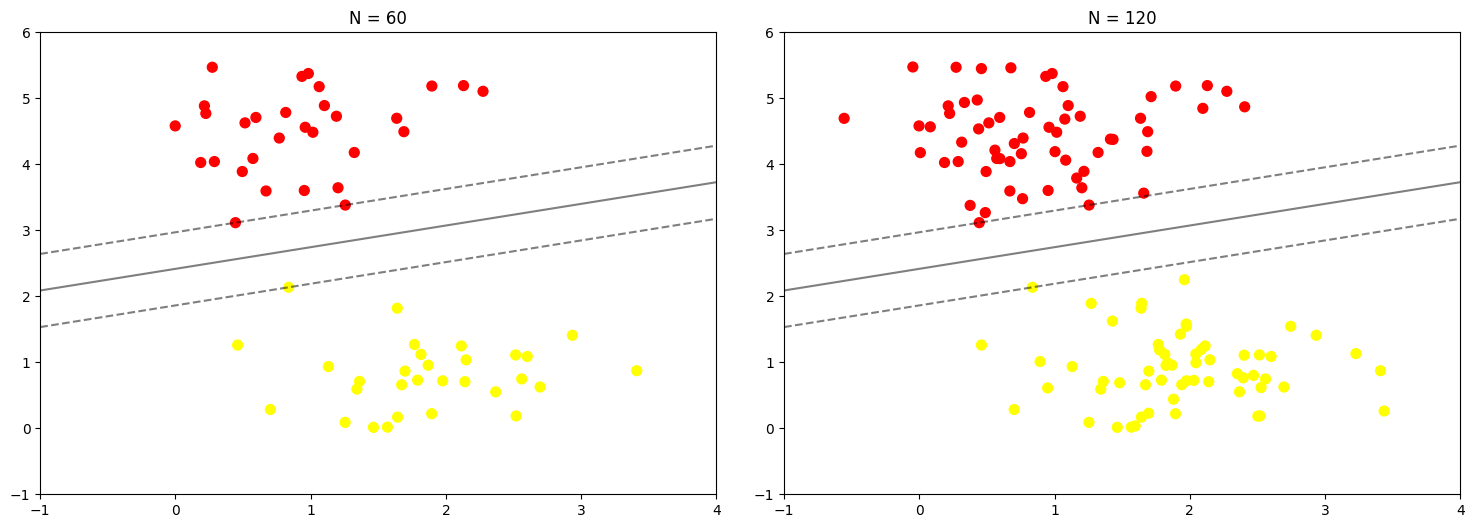

In [115]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

Berdasarkan hasil di atas, perubahan jumlah data tidak mempengaruhi model yang digunakan. Ilustrasi lebih jelas dapat dilihat pada diagram di bawah ini

Install modul ipywidgets

In [116]:
!pip install ipywidgets

In [117]:
# jumlah data dapat dipilih di antara 10 atau 200 buah data, telihat tidak ada perubahan pada model

from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 200], ax=fixed(None))

interactive(children=(Dropdown(description='N', options=(10, 200), value=10), Output()), _dom_classes=('widget…

<function __main__.plot_svm(N=10, ax=None)>

# **Praktikum 2**

Langkah 1 - Ilustrasi Data Non-Linier

Data yang terpisah secara tidak linier menjadi masalah pada model SVM. Oleh karena itu, kernel menjadi sebuah kebutuhan bagi SVM untuk melakukan fitting pada hubungan non-linier dengan sebuah classifier linier.

Langkah 1a - Ilustrasi Data Non-linier

In [118]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.svm import SVC

Langkah 1b - Buat Kembali Fungsi Plotting

In [119]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

Langkah 1c - Buat Data Dummy Non-Linier

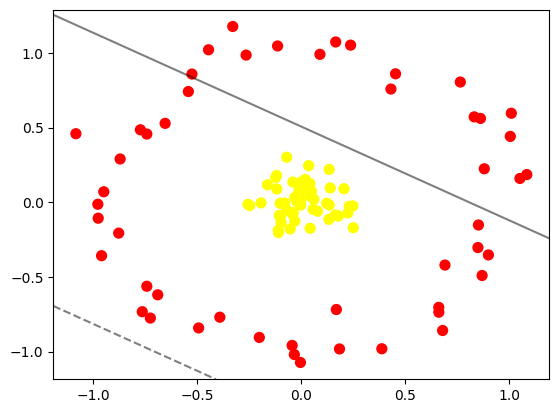

In [120]:
# contoh data tidak terpisah secara linier
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

Karena proyeksi radial tidak cukup menggunakan model 2D, maka plot visualisasi diubah menjadi model 3D.

In [121]:
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 45, 30, 20 , 10], azip=(-180, 180),
         X=fixed(X), y=fixed(y))

interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[-0.021237  ,  0.004098  ],
       [-0.39131997, -0.76938439],
       [-0.2561898 , -0.01425778],
       [-0.20163311, -0.9049562 ],
       [-0.32940643,  1.17674469],
       [ 0.66087833, -0.70355788],
       [ 1.08406197,  0.18548865],
       [ 0.07844794, -0.05968542],
       [ 0.18378168, -0.98188802],
       [-0.19330904, -0.00426779],
       [ 0.69067491, -0.42030289],
       [ 0.16349674, -0.08568796],
       [ 0.08971313,  0.99025257],
       [-0.00470753,  0.00865482],
       [ 0.13407633,  0.21967196],
       [ 0.12260841, -0.00607621],
       [-0.97783203, -0.01324453],
       [-0.54277171,  0.7412536 ],
       [-0.74231361, -0.56211758],
       [ 1.00960255,  0.59592579],
       [-0.2478602 , -0.02181723],
       [ 0.13304699, -0.11406419],
       [ 0.66123276, -0.7359982 ],
       [-0.10141501, -0.00672292],
       [-0.0061964 ,  0.02365553],
       [-0.01152475,  0.07726171],
       [-0.10065468, -0.0946128 ],
       [-0.52547572,  0.8581835 ],
       [-0.0317683 ,  0.03144302],
       [-0.06975227,  0.30109418],
       [-0.95989274, -0.35772338],
       [-0.16260167,  0.117404  ],
       [-0.68982808, -0.61950768],
       [ 0.85157769, -0.15204958],
       [-0.1185541 ,  0.1793202 ],
       [-0.05353884, -0.17911761],
       [ 0.00182692,  0.13558498],
       [ 0.87967414,  0.22426038],
       [-0.72536261, -0.77499813],
       [-0.11747989,  0.08887909],
       [ 0.04143252,  0.12542918],
       [-0.03096813, -0.12620881],
       [-0.04030529,  0.1356312 ],
       [-0.10955147, -0.20269379],
       [-0.87753151, -0.20642912],
       [ 0.7645332 ,  0.80485631],
       [-0.03335285, -1.01913825],
       [-0.49324154, -0.8412947 ],
       [-0.00396826, -1.07244207],
       [ 0.89945125, -0.35262142],
       [ 0.45322574,  0.85993954],
       [-0.03790051, -0.06923039],
       [ 0.25000188, -0.17027778],
       [-0.26511083,  0.98533533],
       [ 0.20525421,  0.09079022],
       [ 0.04918264,  0.0735336 ],
       [-1.08328841,  0.45890484],
       [-0.74235448,  0.45674872],
       [ 0.13438098, -0.01775883],
       [ 0.02156425,  0.08688154],
       [ 0.38726092, -0.98056444],
       [ 0.04306738, -0.17418117],
       [-0.11384616,  1.0462518 ],
       [ 0.16555122,  1.07305507],
       [ 0.67946008, -0.85838493],
       [-0.97611942, -0.10658783],
       [-0.06984883, -0.05280114],
       [-0.0431271 , -0.07762842],
       [ 0.43106218,  0.75794286],
       [ 0.23712844,  1.05186102],
       [ 0.86127567,  0.56133144],
       [ 0.13934666,  0.09598631],
       [ 0.16865214, -0.71793896],
       [ 0.17764123, -0.09209117],
       [ 0.06084468,  0.01985178],
       [-0.44565346,  1.02081686],
       [-0.10538447, -0.0881913 ],
       [-0.09697942, -0.13494603],
       [ 0.05708602, -0.04682408],
       [ 0.03538493,  0.24506368],
       [ 0.22356382, -0.07171339],
       [ 1.05110135,  0.15952006],
       [ 0.24810358, -0.02460522],
       [-0.00271122, -0.01873084],
       [-0.11022079, -0.18665125],
       [-0.07967188, -0.00523072],
       [-0.12295889,  0.16555906],
       [-0.77326906,  0.48528395],
       [ 1.00477595,  0.44100839],
       [-0.87067024,  0.28973703],
       [ 0.83127612,  0.57159144],
       [-0.94925716,  0.07027867],
       [ 0.01911744,  0.15265068],
       [-0.0437923 , -0.95837694],
       [-0.65428942,  0.52822346],
       [ 0.84924329, -0.30314656],
       [ 0.04281978,  0.04105471],
       [ 0.86918855, -0.49025266],
       [-0.76424655, -0.73266576],
       [ 0.23052486, -0.02724324]]), y=array([1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1]))>

Langkah 2 - Fitting Model

Walaupun data dapat ditampilkan secara terpisah. Proyeksi titik data sejumlah N ke dalan suatu dimensi N menyebabkan beban komputasi juga bertambah. Untuk mengatasi hal ini, kernel radial basis function (RBF) pada Scikit-Learn digunakan.

In [122]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

Plot hasil decision boundaries dari kernel RBF

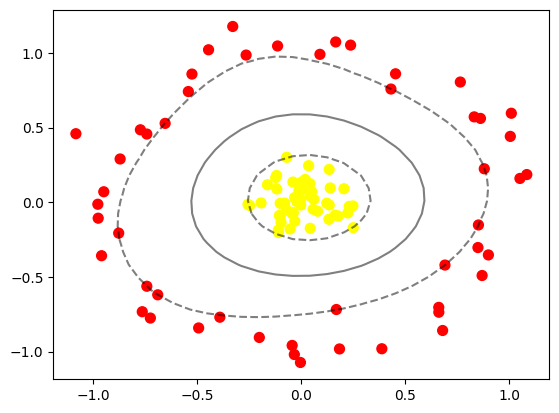

In [123]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')

# **Praktikum 3**

Langkah 1 - Import Library dan Buat Fungsi Plotting

In [124]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.svm import SVC
from sklearn.datasets import make_blobs

In [125]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

Langkah 2 - Buat Data Dummy

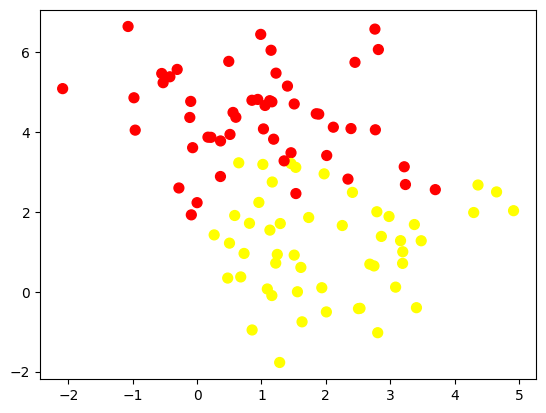

In [126]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

Langkah 3 - Analisis Dampak Tunning

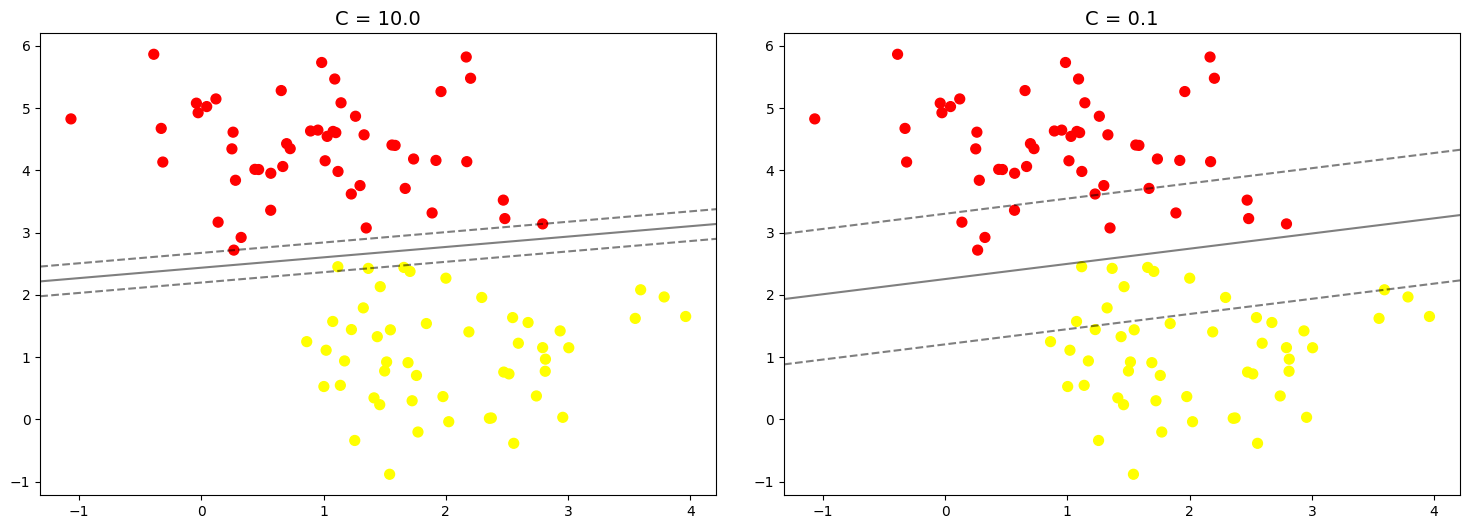

In [127]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

# **Praktikum 4**

Langkah 0 - Unduh Dataset

Dataset yang digunakan dapat diunduh secara langsung melalui scikit-learn.

In [128]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(len(faces.target_names))
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
8
(1348, 62, 47)


Langkah 1 - Inspeksi Citra Wajah

Lakukan inspeksi citra wajah yang akan digunakan.

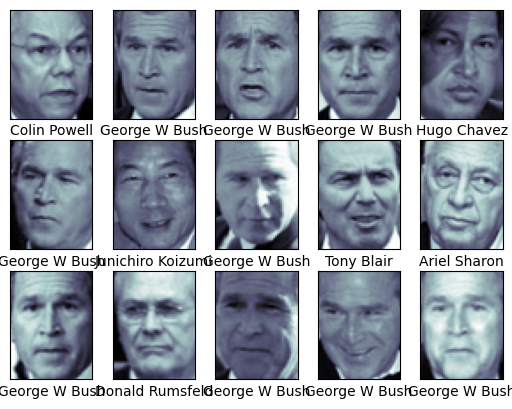

In [129]:
# contoh wajah yang digunakan
from matplotlib import pyplot as plt

fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

Langkah 2 - Pra Pengolahan Data

Pada tahap ini, kita akan mencoba melakukan proses pra pengolahan data sederhana dengan menggunakan Principal Component Analysis (PCA). PCA akan memproyeksikan fitur dengan rosolusi tinggi (banyak dimensi) ke dalam principal component atau fitur yang dianggap penting saja. Metode PCA sering juga disebut sebagai metode reduksi dimensi.

In [130]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')

# Pipeline digunakan untuk melakukan proses secara bertahap dalam
# 1 eksekusi fungsi secara langsung
model = make_pipeline(pca, svc)

Langkah 3 - Split Data

In [131]:
# pemisahan data training dan data testing

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42)

Langkah 4 - Pembuatan Model + Tunning

Pada langkah ini, kita akan mensimulasikan pembuatan model dan hyperparameter tunning secara langsung untuk mendapatkan nilai hyperparameter yang terbaik. Nilai tersebut dapat dicapai salah satunya dengan menggunakan teknik GridSearch. GridSearch akan mencoba menjadi kombinasi hyperparameter terbaik dengan cara melakukan pengujian performansinya satu per satu. Cara ini mudah akan tetapi memakan waktu yang lama dan komputasi yang cukup tinggi.

In [132]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)
print(grid.best_score_)

CPU times: user 2min 17s, sys: 215 ms, total: 2min 17s
Wall time: 1min 45s
{'svc__C': 5, 'svc__gamma': 0.001}
0.828893332683022


Sehingga didapatkan informasi bahwa, hyperparameter terbaik dari model SVM yang kita buat adalah dengan, C=5 dan Gamma=0.001 dengan tingkat akurasi 82.88%. Gunakan model terbaik tersebut untuk proses prediksi.

In [133]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

Langkah 5 - Cek Hasil Prediksi

Cek hasil prediksi pada citra.

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

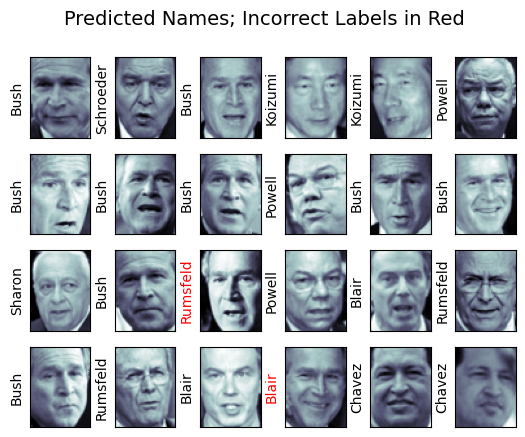

In [134]:
# hasil label pada data testing

fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

Langkah 6 - Cek Performansi

Pertama, cek performansi dengan classification_report dari sklearn.

In [135]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.87      0.74        15
     Colin Powell       0.83      0.88      0.86        68
  Donald Rumsfeld       0.70      0.84      0.76        31
    George W Bush       0.97      0.80      0.88       126
Gerhard Schroeder       0.76      0.83      0.79        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.82      0.98      0.89        42

         accuracy                           0.85       337
        macro avg       0.82      0.86      0.83       337
     weighted avg       0.86      0.85      0.85       337



Dari tabel tersebut, kita mendapatkan informasi terkait dengan akurasi keseluruhan, presisi, recall, dan f1-score untuk setiap label.

Selanjutnya, kita dapat menggunakan confusion matrix untuk mengetahui label label yang terklasifikasi  dengan benar dan tidak.

Text(113.92222222222219, 0.5, 'predicted label')

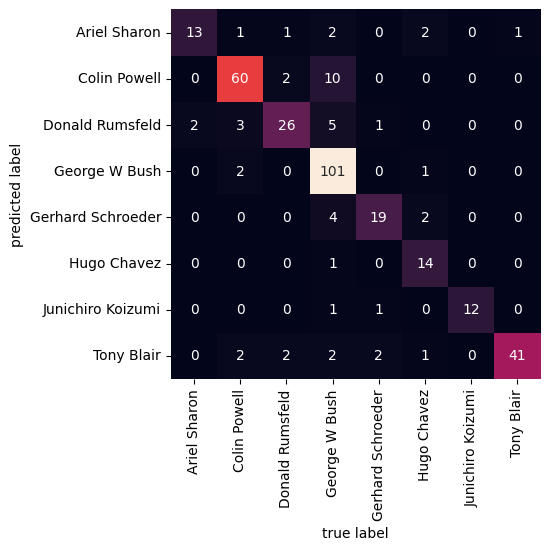

In [136]:
# bentuk confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

# **Praktikum 5**

Langkah 0 - Import Library

In [137]:
# Import Required Libraries
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np
import pandas as pd

In [138]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Lakukan ekstraksi data gambar, kemudian definisikan lokasi gambar. Pada contoh ini, folder gambar berlokasi sama dengan lokasi file python.

In [139]:
# Image directories
train_dir = "/content/drive/MyDrive/Colab Notebooks/Pembelajaran_Mesin/images/images/training"
test_dir = "/content/drive/MyDrive/Colab Notebooks/Pembelajaran_Mesin/images/images/test"

Langkah 1 - Load Data dan Visualisasikan

Buatlah fungsi untuk membuat daftar seluruh path dari gambar.

Load gambar training

In [140]:
def load_dataset(img_dir):
    p = Path(img_dir)
    dirs = p.glob('*')

    img_list = []

    for dir in dirs:
        label = str(dir).split('/')[-1]
        for file in dir.glob('*.jpg'):
            img = mpimg.imread(file)

            if not img is None:
                img_list.append((img, label))

    return img_list

In [141]:
# Load training data
train_img = load_dataset(train_dir)

Lakukan pengecekan pada salah satu data pada list. List harus berisi tuple dengan dua data, yaitu data gambar dan label dari gambar.

In [142]:
# Check the first data
# It should be a tuple consist of arrays of image and image labels
train_img[0]

(array([[[253, 255, 252],
         [253, 255, 252],
         [253, 255, 252],
         ...,
         [ 75,  93,  93],
         [ 73,  91,  91],
         [ 74,  92,  92]],
 
        [[253, 255, 252],
         [253, 255, 252],
         [253, 255, 252],
         ...,
         [ 77,  95,  95],
         [ 76,  94,  94],
         [ 78,  96,  96]],
 
        [[253, 255, 252],
         [253, 255, 252],
         [253, 255, 252],
         ...,
         [ 75,  93,  93],
         [ 74,  92,  92],
         [ 76,  94,  94]],
 
        ...,
 
        [[108, 112, 113],
         [ 98, 102, 103],
         [ 90,  94,  95],
         ...,
         [ 43,  45,  32],
         [ 45,  47,  34],
         [ 48,  50,  37]],
 
        [[107, 111, 112],
         [ 97, 101, 102],
         [ 90,  94,  95],
         ...,
         [ 42,  44,  31],
         [ 45,  47,  34],
         [ 48,  50,  37]],
 
        [[100, 104, 105],
         [ 91,  95,  96],
         [ 86,  90,  91],
         ...,
         [ 42,  44,  31],
  

Cek ukuran gambar secara acak

In [143]:
# Random size checking
pick_random = np.random.randint(0, len(train_img))

# Check img size
print(f'Image {pick_random}')
print(train_img[pick_random][0].shape)

Image 129
(700, 1280, 3)


Tampilkan gambar untuk inspeksi secara visual. Buatlah fungsi untuk membantu memvisualkan gambar

In [144]:
# Function to Visualize
def random_img_viz(img_list):
    rand_num = np.random.randint(0, len(img_list))

    img = img_list[rand_num][0]
    label = img_list[rand_num][1]
    label_str = 'day' if label == 1 else 'night'

    plt.imshow(img)
    print(f'Shape\t: {img.shape}')
    print(f'Label\t: {label}')

Lakukan visualisasi gambar secara acak

Shape	: (591, 800, 3)
Label	: day


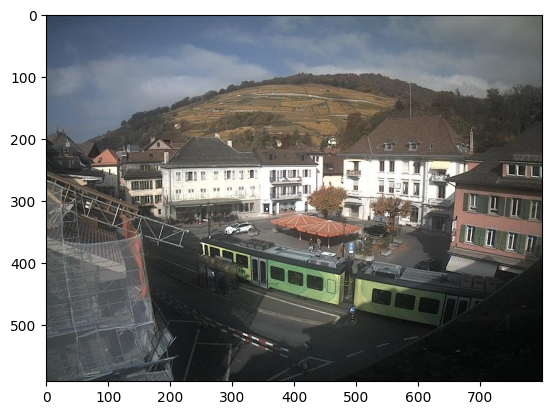

In [145]:
random_img_viz(train_img)

Langkah 3 - Pra Pengolahan Data

Pada tahap ini, kita akan melakukan dua proses utama, yaitu standardisasi ukuran gambar, dan encoding label gambar. Dengan membuat fungsi berikut untuk menstandarkan ukuran gambar.

In [146]:
def standarized_input(image):
    # resize to w: 1100, h:600
    std_img = cv2.resize(image, (1100,600))

    return std_img

Selanjutnya, buatlah fungsi untuk kebutuhan encoding label.

In [147]:
def label_encoder(label):
    # Encode the label
    # day as 1; night as 0
    num_val = 0

    if(label == 'day'):
        num_val = 1

    return num_val

Terakhir, buatlah fungsi untuk melakukan kedua hal tersebut secara sekaligus untuk semua gambar dalam list.

In [148]:
def preprocess(img_list):
    std_img_list = []

    for item in img_list:
        image = item[0]
        label = item[1]

        # Standarized the image
        std_img = standarized_input(image)

        # Create the label
        img_label = label_encoder(label)

        std_img_list.append((std_img, img_label))

    return std_img_list

lakukan pra pengolahan data pada training

In [149]:
train_std_img_list = preprocess(train_img)

lakukan pengecekan ukuran gambar secara acak

In [150]:
# Random size checking
pick_random = np.random.randint(0, len(train_std_img_list))

# Check img size
print(f'Image {pick_random}')
print(train_std_img_list[pick_random][0].shape)

Image 208
(600, 1100, 3)


Melakukan inspeksi visual dengan fungsi random_img_viz yang telah dibuat sebelumnya pada gambar hasil pra pengolahan.

Shape	: (600, 1100, 3)
Label	: 0


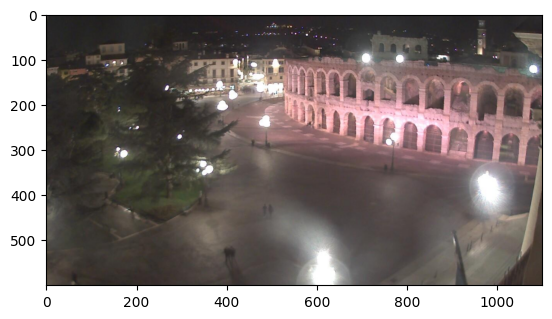

In [160]:
random_img_viz(train_std_img_list)

Langkah 4 - Ekstraksi Fitur

Selanjutnya, untuk dapat membadakan antara label satu dengan label yang lain, kita memerlukan sebuah fitur. Fitur adalah penciri dari sebuah data yang dapat digunakan untuk membendakan data satu dengan yang lain. Pada percobaan kali ini, kita akan menggunakan fitur yang sederhana yaitu nilai rata-rata dari tingkat kecerahan gambar (average brightness). Namun sebelum dapat melakukan hal tersebut, kita akan mengubah ruang warna (colorspace) dari RGB menjadi HSV (Hue, Saturation, Value). Hal ini dikarenakan, tingkat kecerahan (brightness) lebih mudah didapatkan dari HSV berdasarkan nilai Valuenya.

Buatlah fungsi berikut untuk mendapatkan nilai rata-rata tingkat kecerahan.

In [161]:
# Get feature based on average brightness using HSV colorspace
def avg_brightness(image):
    # Convert image to HSV
    img_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Calculate the avg of brightness
    sum_brightness = np.sum(img_hsv[:,:,2]) # take the 3rb value which is the V channel
    area = image.shape[0] * image.shape[1]
    avg = sum_brightness / area

    return avg

Lakukan pengecekan pada gambar secara acak. INGAT! Gunakan gambar yang telah melalui proses pra pengolahan data!

Image 13
Avg Brighness: 110.0866


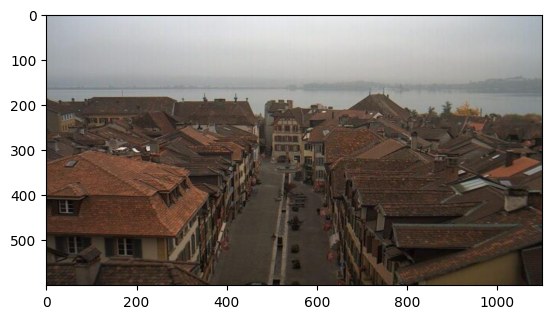

In [162]:
# Check on random image
rand_img = np.random.randint(0, len(train_std_img_list))

feature_img = train_std_img_list[rand_img][0]

avg_img = avg_brightness(feature_img)

print(f'Image {rand_img}')
print(f'Avg Brighness: {avg_img:.4f}')
plt.imshow(feature_img)

Langkah 5 - Klasifikasi dengan Metode Threshold

Pada tahap ini, kita akan melakukan proses klasifikasi sederhana dengan menggunakan nilai ambang batas (threshold) dari nilai rata-rata kecerahan yang kita tentukan sendiri.

Buatlah fungsi berikut,

In [163]:
def predict_label(img, threshold):
    # Computer average brightness
    avg = avg_brightness(img)
    pred = 0

    # Predict the label based on user defined threshold
    if avg > threshold:
        pred = 1

    return pred

Lakukan pengecekan prediksi secara acak pada data training

Image 145
Actual label: 0
Predicted label: 0


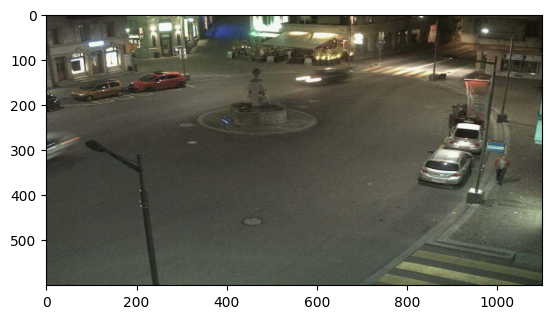

In [166]:
# Test the classifier on train data
rand_img = np.random.randint(0, len(train_std_img_list))

pred = predict_label(train_std_img_list[rand_img][0], threshold=120)

# Evaluate
print(f'Image {rand_img}')
print(f'Actual label: {train_std_img_list[rand_img][1]}')
print(f'Predicted label: {pred}')
plt.imshow(train_std_img_list[rand_img][0])

Langkah 6 - Evaluasi Manual

Selanjutnya kita akan membuat fungsi evaluasi model sederhana, yaitu dengan membandingkan label yang diprediksi benar dengan seluruh data. Ingat kembali konsep confussion matrix.

Buatlah fungsi berikut,

In [167]:
def evaluate(img_list, threshold):
    miss_labels = []

    for file in img_list:
        # Get the ground truth / correct label
        img = file[0]
        label = file[1]

        # Get prediction
        pred_label = predict_label(img, threshold)

        # Compare ground truth and pred
        if pred_label != label:
            miss_labels.append((img, pred_label, label))

    total_img = len(img_list)
    corr_pred = total_img - len(miss_labels)
    accuracy = corr_pred / total_img

    print(f'Accuracy: {accuracy:.4f}')

Lakukan evaluasi pada data training dengan nilai ambang batas 120.

In [168]:
# Evaluate on train data
evaluate(train_std_img_list, threshold=120)

Accuracy: 0.8417


Anda dapat mengubah nilai ambang batas dan amati hasilnya.

Selanjutnya, kita akan melakukan evaluasi pada data testing. Namun sebelumnya, data testing harus diperlakukan sama dengan data training dalam konteks pra progolahan data dan ekstraksi fitur.

In [169]:
# Evaluate on test data

# Load test data
test_img = load_dataset(test_dir)

# Preprocess
test_std_img_list = preprocess(test_img)

# Predict
evaluate(test_std_img_list, threshold=120)

Accuracy: 0.8688
